# Importing and reading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r'C:\Users\User\Desktop\Telco-Customer-Churn.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Analyzing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**We can see that there are no null values**

In [86]:
#Comparing churn count with respect to gender 

pivot = pd.pivot_table(df,index=df['gender'],values='SeniorCitizen',columns=df['Churn'],aggfunc='count')
pivot

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


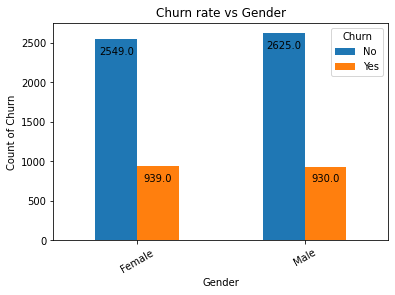

In [91]:
#using a bargraph to use the visualize the pivoted data

pivot_plot = pivot.plot.bar()
plt.xlabel("Gender")
plt.ylabel("Count of Churn")
plt.title("Churn rate vs Gender")
plt.xticks(rotation=30)

for p in pivot_plot.patches:
    pivot_plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

**Insight : The company has retained most of its subscribers, from the plot we can see that both males and females still use the services**

In [134]:
#Counting the total female senior citizens

da=df.loc[(df.SeniorCitizen==1),'gender'].value_counts()
da

Male      574
Female    568
Name: gender, dtype: int64

**There is 568 female senior citizens**

Text(0.5, 1.0, 'Tenure Vs TotalCharges')

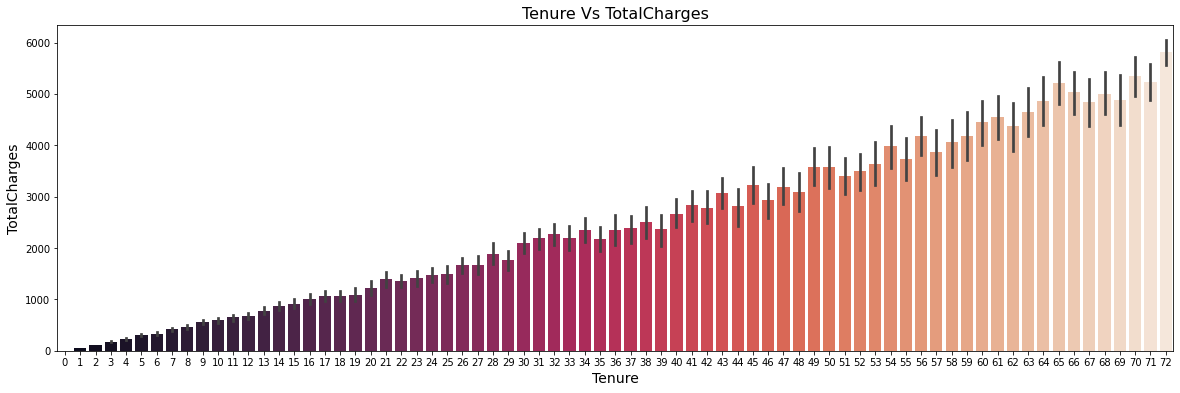

In [144]:
#Using a barplot to compare tenure and totalcharges

plt.figure(figsize=(20,6))
sns.barplot(x='tenure', y= 'TotalCharges', data=df,palette="rocket")
plt.xlabel('Tenure',fontsize=14)
plt.ylabel('TotalCharges',fontsize=14)
plt.title('Tenure Vs TotalCharges',fontsize=16)

Text(0.5, 1.0, 'Tenure Vs TotalCharges')

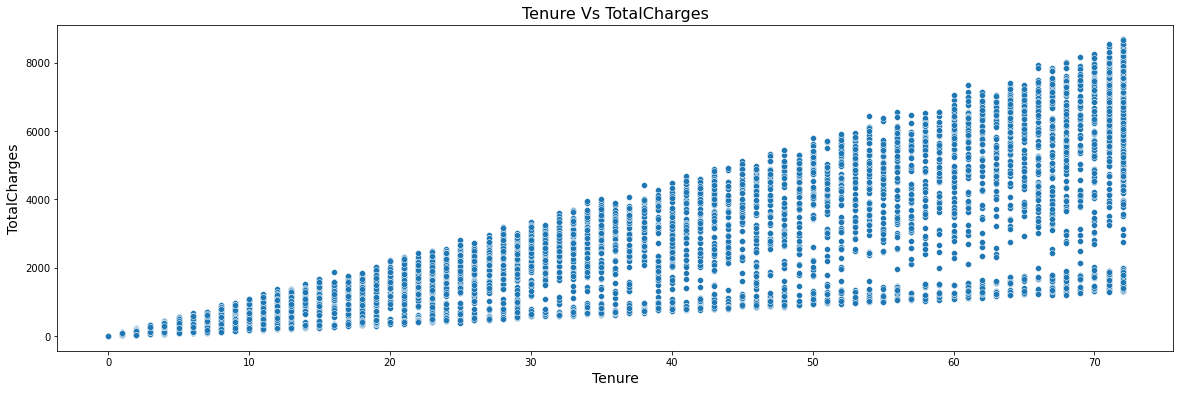

In [206]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='tenure', y= 'TotalCharges', data=df,palette="rocket")
plt.xlabel('Tenure',fontsize=14)
plt.ylabel('TotalCharges',fontsize=14)
plt.title('Tenure Vs TotalCharges',fontsize=16)

**Insight : There is a positive relation between tenure and total charges**

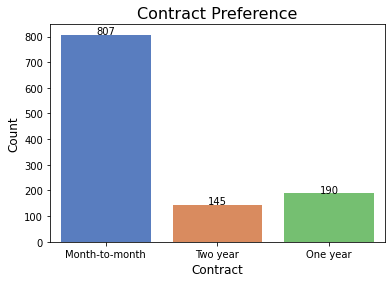

In [187]:
#Using a count plot to determine the contract preference of senior citizens

snr = df[df['SeniorCitizen']==1]
cont = sns.countplot(x=snr['Contract'],palette='muted')
plt.title("Contract Preference",fontsize=16)
plt.xlabel("Contract",fontsize=12)
plt.ylabel('Count',fontsize=12)
#plt.legend('',frameon=False)

for p in cont.patches:
        height = p.get_height()
        cont.text(p.get_x()+p.get_width()/2., height + 0.5,
            height, ha="center")


**Insight :  We can see that Senior Citizens prefer Month-to-month contracts**

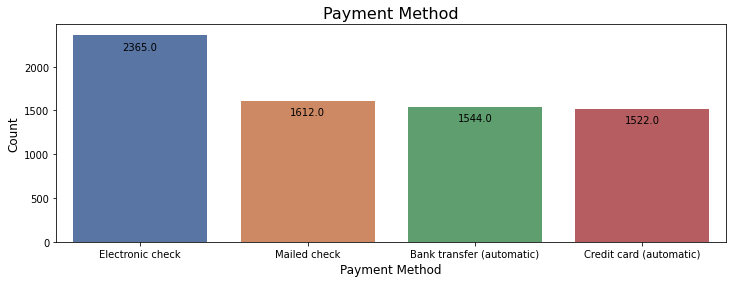

In [202]:
#Using  count plot to check the preferred payment method of customers

plt.figure(figsize=(12,4))
pay = sns.countplot(x='PaymentMethod', data=df,palette='deep')
plt.title("Payment Method",fontsize=16)
plt.xlabel('Payment Method',fontsize=12)
plt.ylabel('Count',fontsize=12)

for p in pay.patches:
    pay.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

**Insight : We can infer that most of the subscribers prefer electronic check when compared to other payment method**

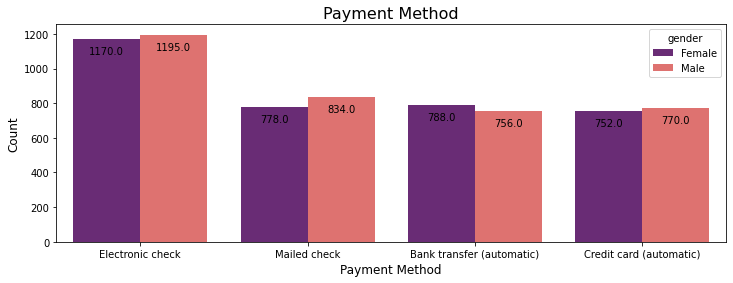

In [205]:
#Using  count plot to check the preferred payment method of gender

plt.figure(figsize=(12,4))
pay = sns.countplot(x="PaymentMethod", hue="gender", data=df,palette='magma')
plt.title("Payment Method",fontsize=16)
plt.xlabel('Payment Method',fontsize=12)
plt.ylabel('Count',fontsize=12)


for p in pay.patches:
    pay.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

**Insight : the same can be said for gender as well, they prefer electronic checks**